In [22]:

import pyodbc
import pandas as pd
# Parametri di connessione al database SQL Azure
server = 'pw2-g2-y2-sqlserver.database.windows.net'
database = 'BC_Data'
username = 'group2_admin_pw2'
password = 'AlfaBravo2'
driver = '{ODBC Driver 17 for SQL Server}'  # Potrebbe variare a seconda del driver installato

# Stringa di connessione
connection_string = f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}'

# Query SELECT FROM ml.region_sex
query = 'SELECT * FROM ml.region_sex'

try:
    # Connessione al database
    conn = pyodbc.connect(connection_string)
    cursor = conn.cursor()

    # Esecuzione della query SELECT
    cursor.execute(query)

  # Recupero dei risultati e creazione di un DataFrame
    columns = [column[0] for column in cursor.description]
    rows = cursor.fetchall()
    data = [tuple(row) for row in rows]
    
    df = pd.DataFrame(data, columns=columns)

    # Stampa del DataFrame
    print(df)
    

except Exception as e:
    print(f'Errore durante l\'esecuzione della query: {str(e)}')

finally:
    # Chiudi la connessione quando hai finito
    conn.close()

       measure     sex               age          cause  metric  year  \
0       Deaths    Male          All ages  Breast cancer  Number  1990   
1       Deaths  Female          All ages  Breast cancer  Number  1990   
2       Deaths    Both          All ages  Breast cancer  Number  1990   
3       Deaths    Male          All ages  Breast cancer    Rate  1990   
4       Deaths  Female          All ages  Breast cancer    Rate  1990   
..         ...     ...               ...            ...     ...   ...   
499  Incidence  Female          All ages  Breast cancer    Rate  2017   
500  Incidence    Both          All ages  Breast cancer    Rate  2017   
501  Incidence    Male  Age-standardized  Breast cancer    Rate  2017   
502  Incidence  Female  Age-standardized  Breast cancer    Rate  2017   
503  Incidence    Both  Age-standardized  Breast cancer    Rate  2017   

                val           upper           lower  
0      5889.1390720    6370.6894420    5425.1358940  
1    375016.059

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Seleziona solo le colonne numeriche
numerical_columns = df[['val', 'upper', 'lower']].astype(float)# Calcolo delle statistiche di base

# Calcolo delle statistiche di base
statistics_summary = numerical_columns.describe()# Stampa del DataFrame

#riepilogo statistico
print(statistics_summary)

                val         upper         lower
count  1.008000e+03  1.008000e+03  1.008000e+03
mean   1.028026e+05  1.071787e+05  9.778238e+04
std    2.577859e+05  2.670586e+05  2.470003e+05
min    3.694908e+00  4.304274e+00  3.088820e+00
25%    8.826595e+00  9.548509e+00  8.141536e+00
50%    1.764304e+01  1.866835e+01  1.656507e+01
75%    8.131563e+04  8.769299e+04  7.501382e+04
max    1.890100e+06  2.010465e+06  1.771259e+06
                   val           upper           lower
count             1008            1008            1008
unique            1008            1008            1008
top     380905.1980000  396713.6901000  364814.6218000
freq                 1               1               1


Eda ml.region_sex

  measure  year   sex       age                  cause   metric Location  \
0  DALYs   1990  Both  All ages        Metabolic risks     Rate   Global   
1  DALYs   1990  Both  All ages          Dietary risks   Number   Global   
2  DALYs   1990  Both  All ages          Dietary risks  Percent   Global   
3  DALYs   1990  Both  All ages          Dietary risks     Rate   Global   
4  DALYs   1990  Both  All ages  Low physical activity   Number   Global   

             val           upper           lower  
0      13.974971      27.0729679       4.7490287  
1  409909.048800  544545.8288000  203474.0189000  
2       0.035100       0.0461937       0.0172341  
3       7.662070      10.1787165       3.8033610  
4  109945.712900  202204.2230000   51945.6522300  
                val
count  5.040000e+03
mean   4.296196e+04
std    1.554452e+05
min    6.026000e-03
25%    6.022958e-02
50%    1.485457e+00
75%    4.648560e+03
max    1.923834e+06


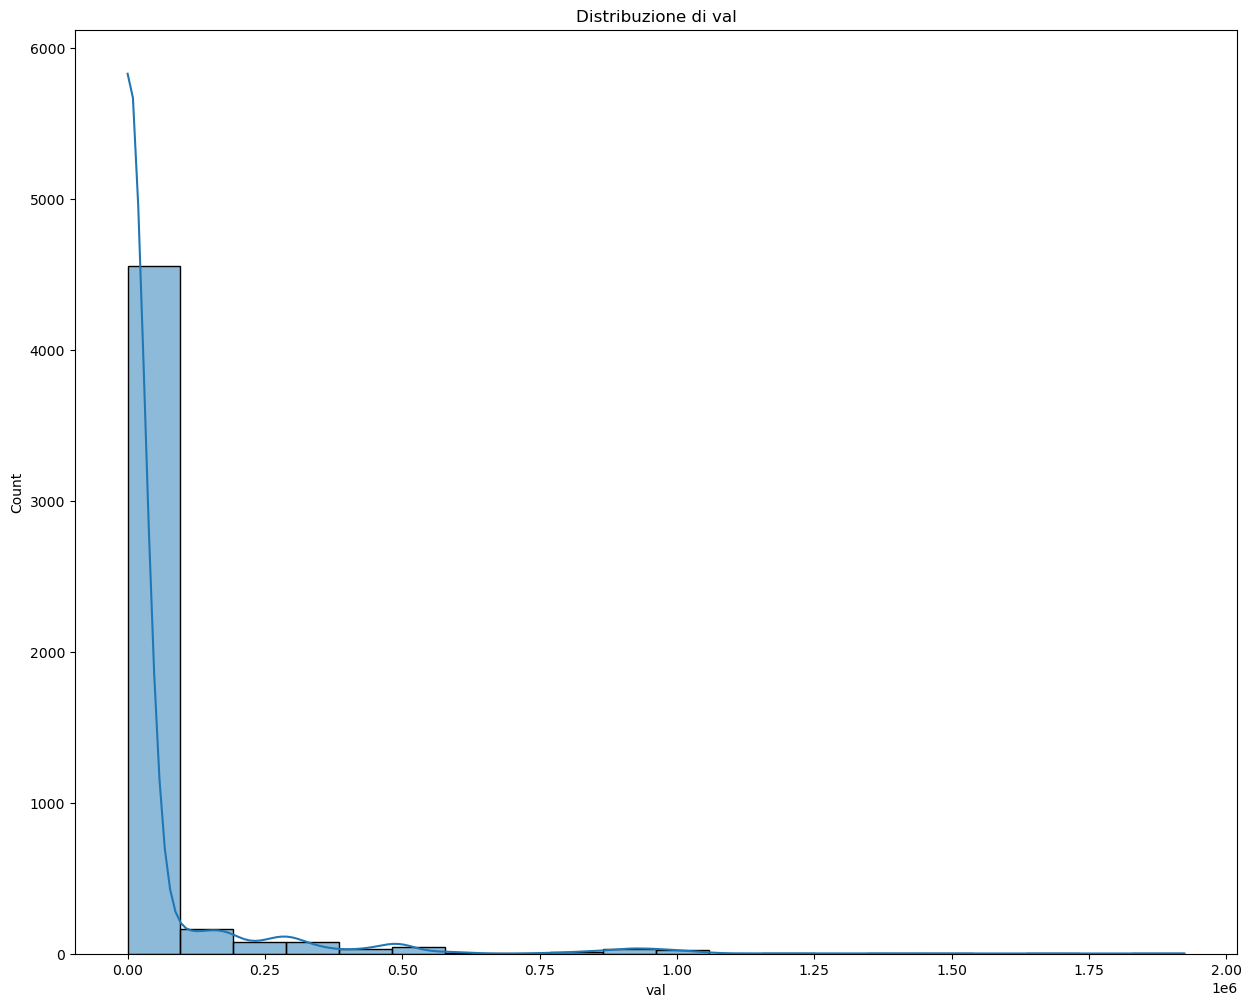

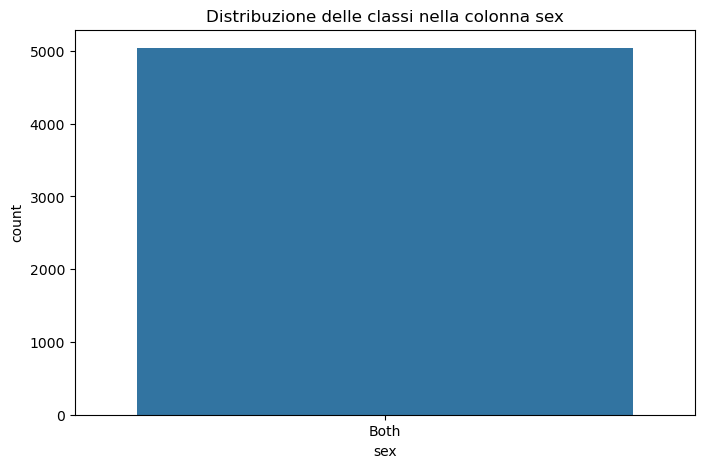

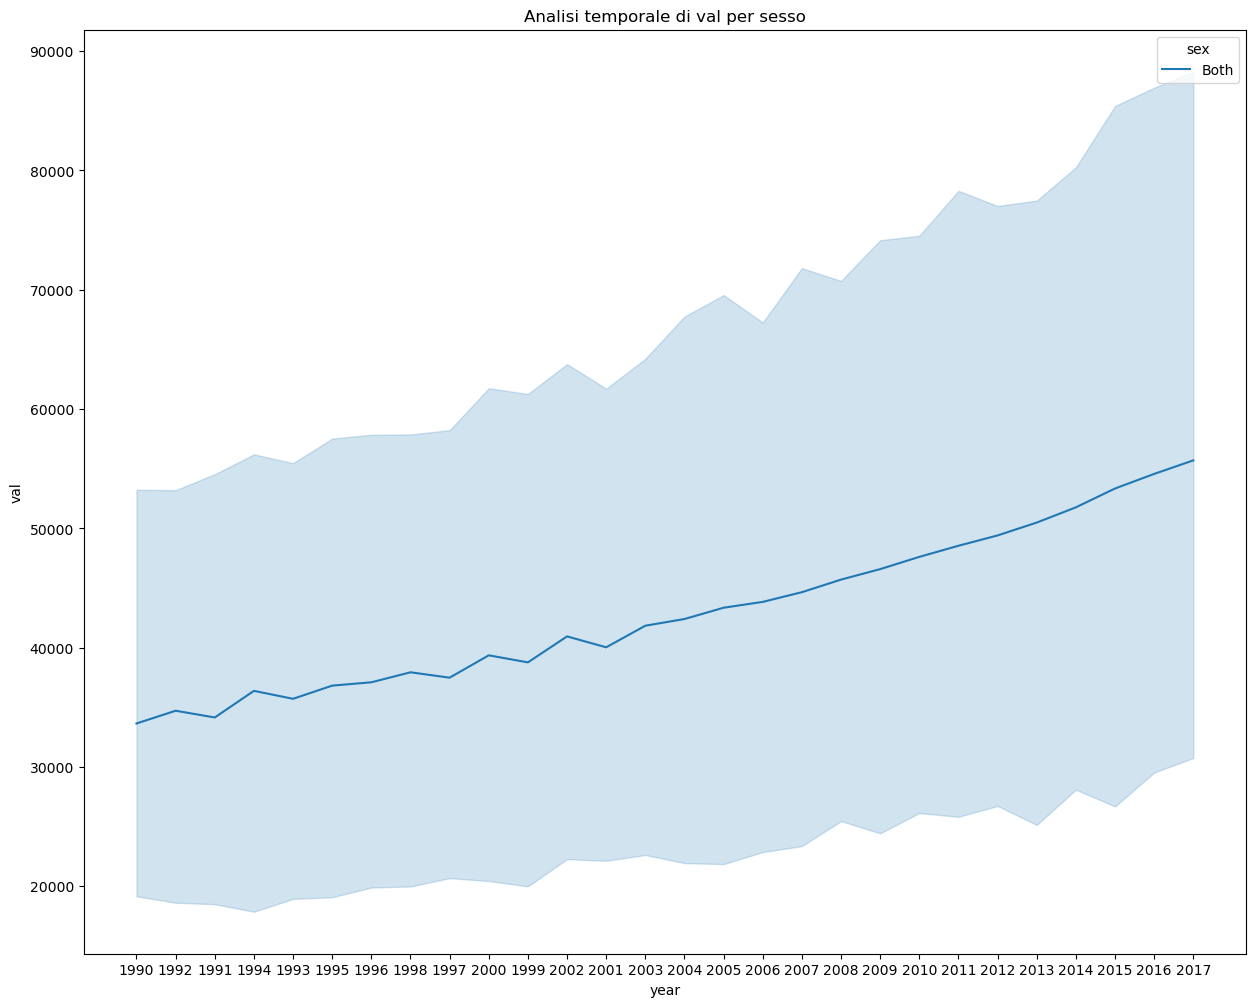

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizzazione delle prime righe del DataFrame
print(df.head())

# Statistiche descrittive
print(df.describe())

# Distribuzione di 'val' utilizzando un istogramma
plt.figure(figsize=(15, 12))
sns.histplot(df['val'], bins=20, kde=True)
plt.title('Distribuzione di val')
plt.show()

# Distribuzione delle classi nella colonna 'sex'
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', data=df)
plt.title('Distribuzione delle classi nella colonna sex')
plt.show()

# Analisi temporale di 'val'
plt.figure(figsize=(15, 12))
sns.lineplot(x='year', y='val', hue='sex', data=df)
plt.title('Analisi temporale di val per sesso')
plt.show()


Eda ML.Nation

Eda ml.region_sdi

Calcolo percentuale di mortalità nel tempo per paese

In [13]:
import pyodbc
import pandas as pd
# Parametri di connessione al database SQL Azure
server = 'pw2-g2-y2-sqlserver.database.windows.net'
database = 'BC_Data'
username = 'group2_admin_pw2'
password = 'AlfaBravo2'
driver = '{ODBC Driver 17 for SQL Server}'

# Stringa di connessione
connection_string = f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}'

# Query SELECT
query = 'SELECT * FROM ml.region_sdi'

try:
    # Connessione al database
    conn = pyodbc.connect(connection_string)
    cursor = conn.cursor()

    # Esecuzione della query SELECT
    cursor.execute(query)

  # Recupero dei risultati e creazione di un DataFrame
    columns = [column[0] for column in cursor.description]
    rows = cursor.fetchall()
    data = [tuple(row) for row in rows]
    
    df = pd.DataFrame(data, columns=columns)

    # Stampa del DataFrame
    print(df)
    

except Exception as e:
    print(f'Errore durante l\'esecuzione della query: {str(e)}')

finally:
    # Chiudi la connessione quando hai finito
    conn.close()

        measure    location   sex               age          cause  metric  \
0        Deaths      Global  Both          All ages  Breast cancer  Number   
1        Deaths      Global  Both          All ages  Breast cancer    Rate   
2        Deaths      Global  Both  Age-standardized  Breast cancer    Rate   
3        Deaths      Global  Both          All ages  Breast cancer  Number   
4        Deaths      Global  Both          All ages  Breast cancer    Rate   
...         ...         ...   ...               ...            ...     ...   
1003  Incidence  Middle SDI  Both          All ages  Breast cancer    Rate   
1004  Incidence  Middle SDI  Both  Age-standardized  Breast cancer    Rate   
1005  Incidence  Middle SDI  Both          All ages  Breast cancer  Number   
1006  Incidence  Middle SDI  Both          All ages  Breast cancer    Rate   
1007  Incidence  Middle SDI  Both  Age-standardized  Breast cancer    Rate   

      year             val           upper           lower  
0 

In [14]:
import pandas as pd
# Seleziona solo le colonne numeriche
numerical_columns = df[['val', 'upper', 'lower']].astype(float)

# Calcolo delle statistiche di base
statistics_summary = numerical_columns.describe()

#riepilogo statistico
print(statistics_summary)


                 val          upper          lower
count   51408.000000   51408.000000   51408.000000
mean     1015.267347    1120.085374     914.512650
std      8429.381586    9149.917495    7732.844309
min         0.000003       0.000005       0.000003
25%         0.006025       0.007150       0.004913
50%         9.317547      11.235109       7.476909
75%        31.612512      37.002254      27.286717
max    337192.153800  403167.461400  278195.349200


Tasso medio di cancro al seno per paesi con categoria 'low_sdi': nan
Tasso medio di cancro al seno per paesi con categoria 'middle_sdi' e 'high_sdi': nan


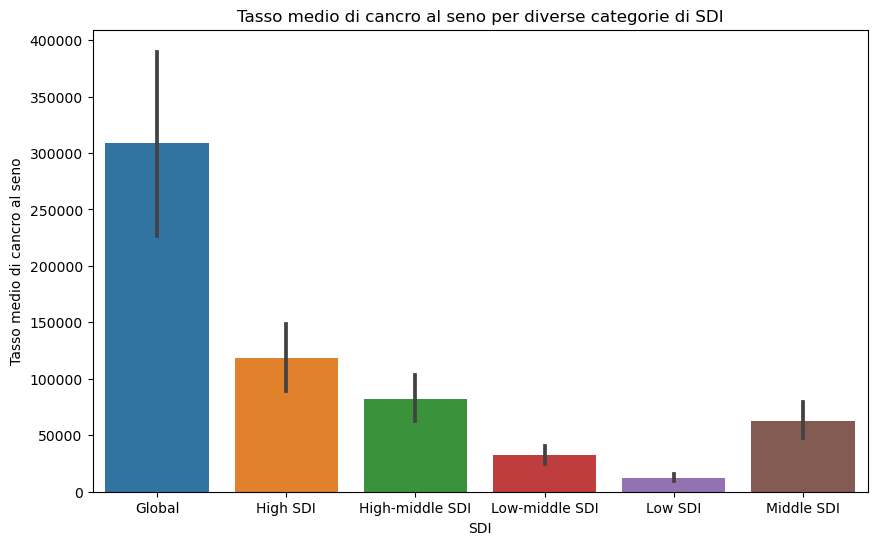

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Converti la colonna 'val' in tipo numerico, se possibile
df['val'] = pd.to_numeric(df['val'], errors='coerce')

# Rimuovi eventuali righe con valori mancanti nella colonna 'val'
df = df.dropna(subset=['val'])

# Filtraggio del DataFrame per paesi con categoria 'low_sdi'
low_sdi_df = df[df['location'] == 'low_sdi']

# Filtraggio del DataFrame per paesi con categoria 'middle_sdi' e 'high_sdi'
medium_high_sdi_df = df[df['location'].isin(['middle_sdi', 'high_sdi'])]

# Calcolo del tasso medio di cancro al seno per le diverse categorie di SDI
mean_cancer_rate_low_sdi = low_sdi_df['val'].mean()
mean_cancer_rate_medium_high_sdi = medium_high_sdi_df['val'].mean()

# Visualizzazione dei risultati
print(f"Tasso medio di cancro al seno per paesi con categoria 'low_sdi': {mean_cancer_rate_low_sdi}")
print(f"Tasso medio di cancro al seno per paesi con categoria 'middle_sdi' e 'high_sdi': {mean_cancer_rate_medium_high_sdi}")

# Visualizzazione del tasso medio tramite un grafico a barre
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='val', data=df)
plt.title('Tasso medio di cancro al seno per diverse categorie di SDI')
plt.xlabel('SDI')
plt.ylabel('Tasso medio di cancro al seno')
plt.show()


In [16]:
import pyodbc
import pandas as pd
# Parametri di connessione al database SQL Azure
server = 'pw2-g2-y2-sqlserver.database.windows.net'
database = 'BC_Data'
username = 'group2_admin_pw2'
password = 'AlfaBravo2'
driver = '{ODBC Driver 17 for SQL Server}'  # Potrebbe variare a seconda del driver installato

# Stringa di connessione
connection_string = f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}'

# Query SELECT
query = 'SELECT * FROM ml.nation'

try:
    # Connessione al database
    conn = pyodbc.connect(connection_string)
    cursor = conn.cursor()

    # Esecuzione della query SELECT
    cursor.execute(query)

  # Recupero dei risultati e creazione di un DataFrame
    columns = [column[0] for column in cursor.description]
    rows = cursor.fetchall()
    data = [tuple(row) for row in rows]
    
    df = pd.DataFrame(data, columns=columns)

    # Stampa del DataFrame
    print(df)
    

except Exception as e:
    print(f'Errore durante l\'esecuzione della query: {str(e)}')

finally:
    # Chiudi la connessione quando hai finito
    conn.close()

         measure     location   sex               age          cause   metric  \
0         Deaths  Timor-Leste  Both          All ages  Breast cancer   Number   
1         Deaths  Timor-Leste  Both          All ages  Breast cancer  Percent   
2         Deaths  Timor-Leste  Both          All ages  Breast cancer     Rate   
3         Deaths  Timor-Leste  Both  Age-standardized  Breast cancer     Rate   
4         Deaths        Haiti  Both          All ages  Breast cancer   Number   
...          ...          ...   ...               ...            ...      ...   
51403  Incidence   Venezuela   Both          All ages  Breast cancer   Number   
51404  Incidence   Venezuela   Both          All ages  Breast cancer  Percent   
51405  Incidence   Venezuela   Both          All ages  Breast cancer     Rate   
51406  Incidence   Venezuela   Both  Age-standardized  Breast cancer  Percent   
51407  Incidence   Venezuela   Both  Age-standardized  Breast cancer     Rate   

       year           val  

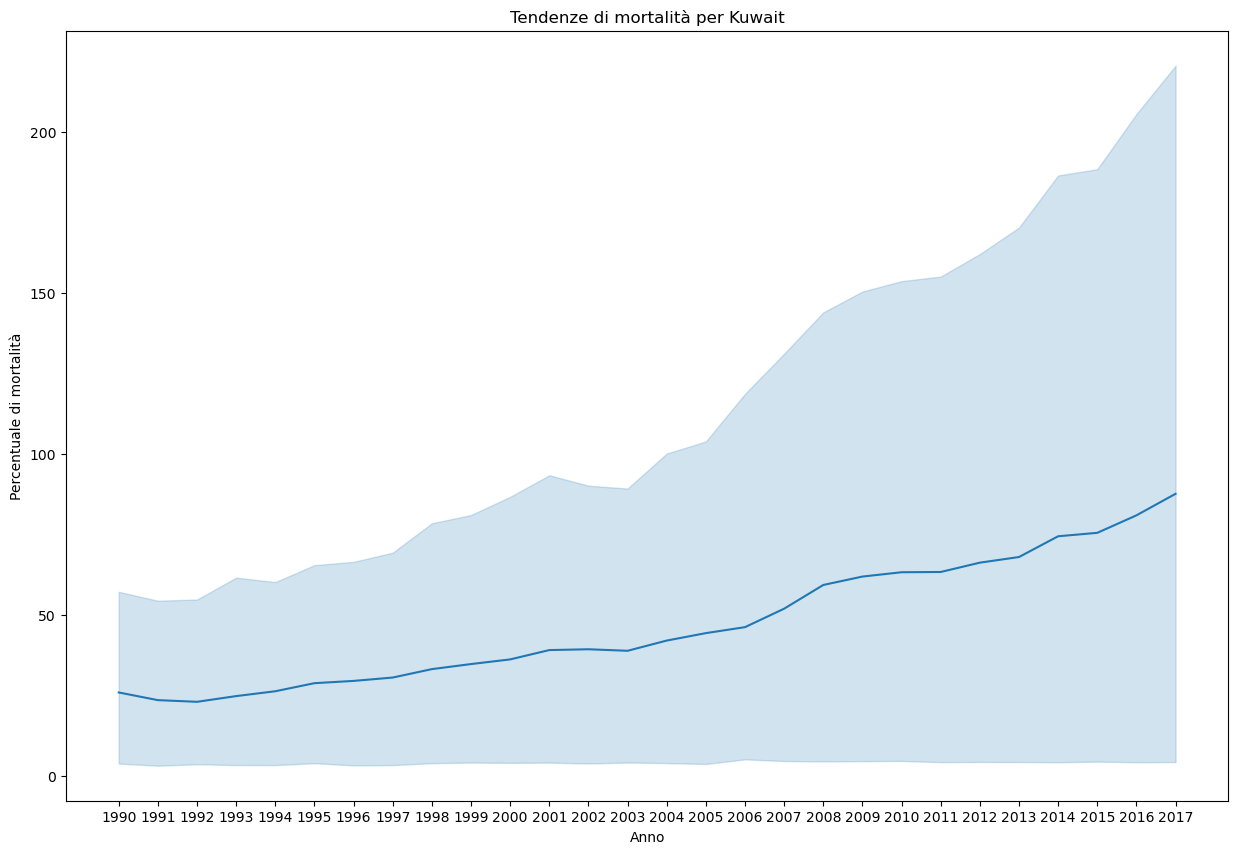

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# metriche selezionate
selected_country = 'Kuwait'
selected_metric = 'Rate'

df_selected_country = df[df['location'] == selected_country]
df_selected_metric = df[df['metric'] == selected_metric]

# Ordina il DataFrame in base all'anno
df_selected_country = df_selected_country.sort_values(by='year')

#creazione del grafico
plt.figure(figsize=(15, 10))
sns.lineplot(x='year', y='val', data=df_selected_country)
plt.title(f'Tendenze di mortalità per {selected_country}')
plt.xlabel('Anno')
plt.ylabel('Percentuale di mortalità')
plt.show()


In [37]:
import pyodbc
import pandas as pd
# Parametri di connessione al database SQL Azure
server = 'pw2-g2-y2-sqlserver.database.windows.net'
database = 'BC_Data'
username = 'group2_admin_pw2'
password = 'AlfaBravo2'
driver = '{ODBC Driver 17 for SQL Server}'

# Stringa di connessione
connection_string = f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}'

# Query SELECT
query = 'SELECT * FROM ml.region_sdi'

try:
    # Connessione al database
    conn = pyodbc.connect(connection_string)
    cursor = conn.cursor()

    # Esecuzione della query SELECT
    cursor.execute(query)

  # Recupero dei risultati e creazione di un DataFrame
    columns = [column[0] for column in cursor.description]
    rows = cursor.fetchall()
    data = [tuple(row) for row in rows]
    
    df = pd.DataFrame(data, columns=columns)

    # Stampa del DataFrame
    print(df)
    

except Exception as e:
    print(f'Errore durante l\'esecuzione della query: {str(e)}')

finally:
    # Chiudi la connessione quando hai finito
    conn.close()

        measure    location   sex               age          cause  metric  \
0        Deaths      Global  Both          All ages  Breast cancer  Number   
1        Deaths      Global  Both          All ages  Breast cancer    Rate   
2        Deaths      Global  Both  Age-standardized  Breast cancer    Rate   
3        Deaths      Global  Both          All ages  Breast cancer  Number   
4        Deaths      Global  Both          All ages  Breast cancer    Rate   
...         ...         ...   ...               ...            ...     ...   
1003  Incidence  Middle SDI  Both          All ages  Breast cancer    Rate   
1004  Incidence  Middle SDI  Both  Age-standardized  Breast cancer    Rate   
1005  Incidence  Middle SDI  Both          All ages  Breast cancer  Number   
1006  Incidence  Middle SDI  Both          All ages  Breast cancer    Rate   
1007  Incidence  Middle SDI  Both  Age-standardized  Breast cancer    Rate   

      year             val           upper           lower  
0 

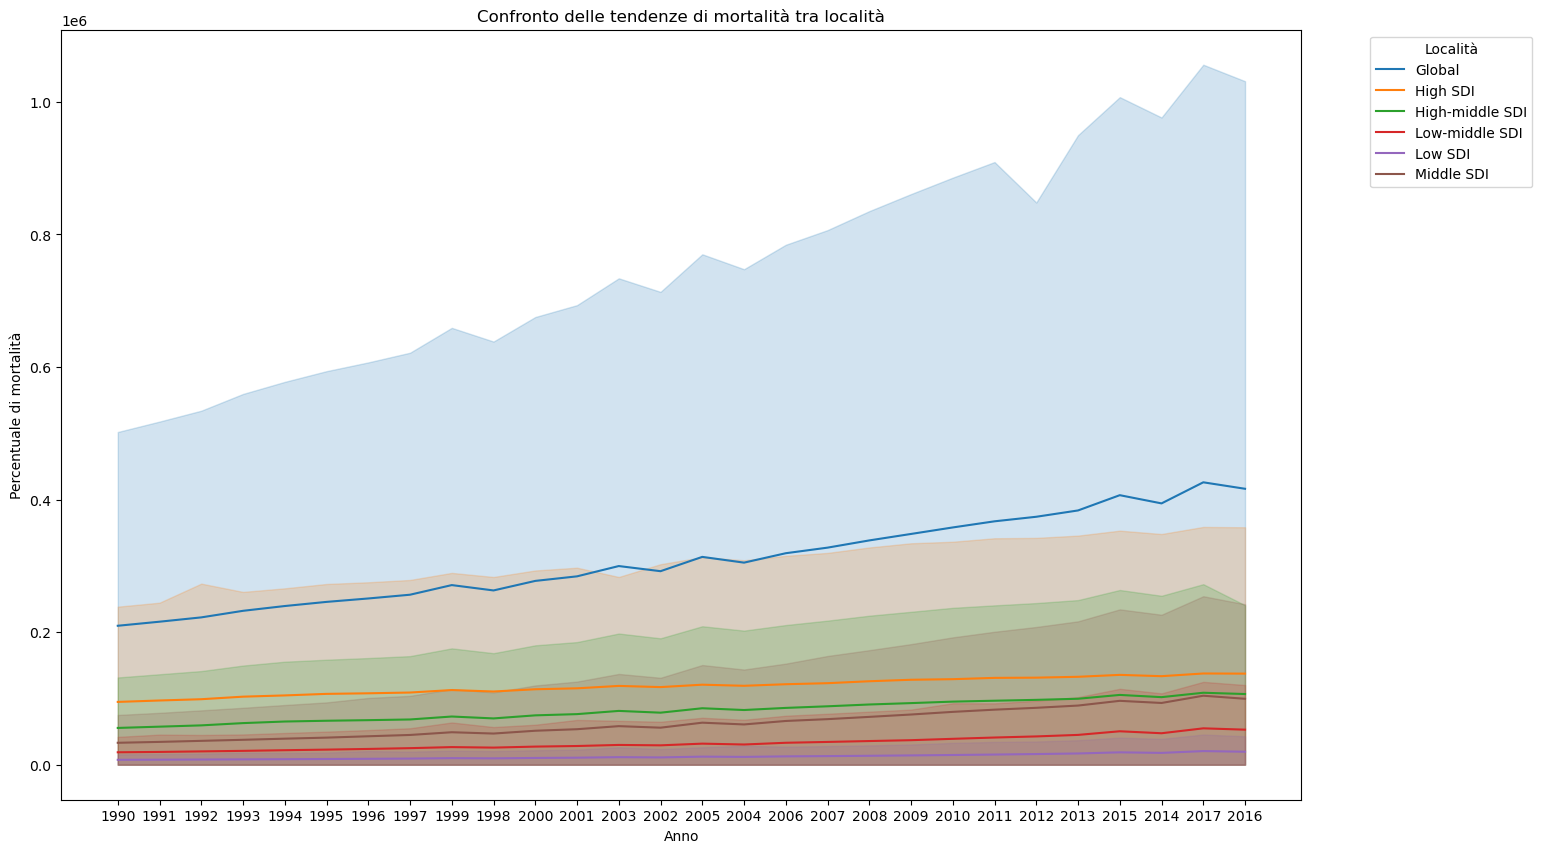

In [39]:
#confronto delle tendenze di mortalità per regioni suddivise per sdi

plt.figure(figsize=(16, 10))
sns.lineplot(x='year', y='val', hue='location', data=df)
plt.title('Confronto delle tendenze di mortalità tra località')
plt.xlabel('Anno')
plt.ylabel('Percentuale di mortalità')
plt.legend(title='Località', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [1]:
import pyodbc
import pandas as pd
# Parametri di connessione al database SQL Azure
server = 'pw2-g2-y2-sqlserver.database.windows.net'
database = 'BC_Data'
username = 'group2_admin_pw2'
password = 'AlfaBravo2'
driver = '{ODBC Driver 17 for SQL Server}'  # Potrebbe variare a seconda del driver installato

# Stringa di connessione
connection_string = f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}'

# Query SELECT FROM ml.region_sex
query = 'SELECT * FROM ml.percent1'

try:
    # Connessione al database
    conn = pyodbc.connect(connection_string)
    cursor = conn.cursor()

    # Esecuzione della query SELECT
    cursor.execute(query)

  # Recupero dei risultati e creazione di un DataFrame
    columns = [column[0] for column in cursor.description]
    rows = cursor.fetchall()
    data = [tuple(row) for row in rows]
    
    df = pd.DataFrame(data, columns=columns)

    # Stampa del DataFrame
    print(df)
    

except Exception as e:
    print(f'Errore durante l\'esecuzione della query: {str(e)}')

finally:
    # Chiudi la connessione quando hai finito
    conn.close()

     measure  year   sex       age                  cause   metric  Location  \
0     DALYs   1990  Both  All ages        Metabolic risks     Rate    Global   
1     DALYs   1990  Both  All ages          Dietary risks   Number    Global   
2     DALYs   1990  Both  All ages          Dietary risks  Percent    Global   
3     DALYs   1990  Both  All ages          Dietary risks     Rate    Global   
4     DALYs   1990  Both  All ages  Low physical activity   Number    Global   
...      ...   ...   ...       ...                    ...      ...       ...   
5035  Deaths  2015  Both  All ages          Dietary risks  Percent  High SDI   
5036  Deaths  2015  Both  All ages          Dietary risks     Rate  High SDI   
5037  Deaths  2015  Both  All ages  Low physical activity   Number  High SDI   
5038  Deaths  2015  Both  All ages  Low physical activity  Percent  High SDI   
5039  Deaths  2015  Both  All ages  Low physical activity     Rate  High SDI   

                 val           upper   

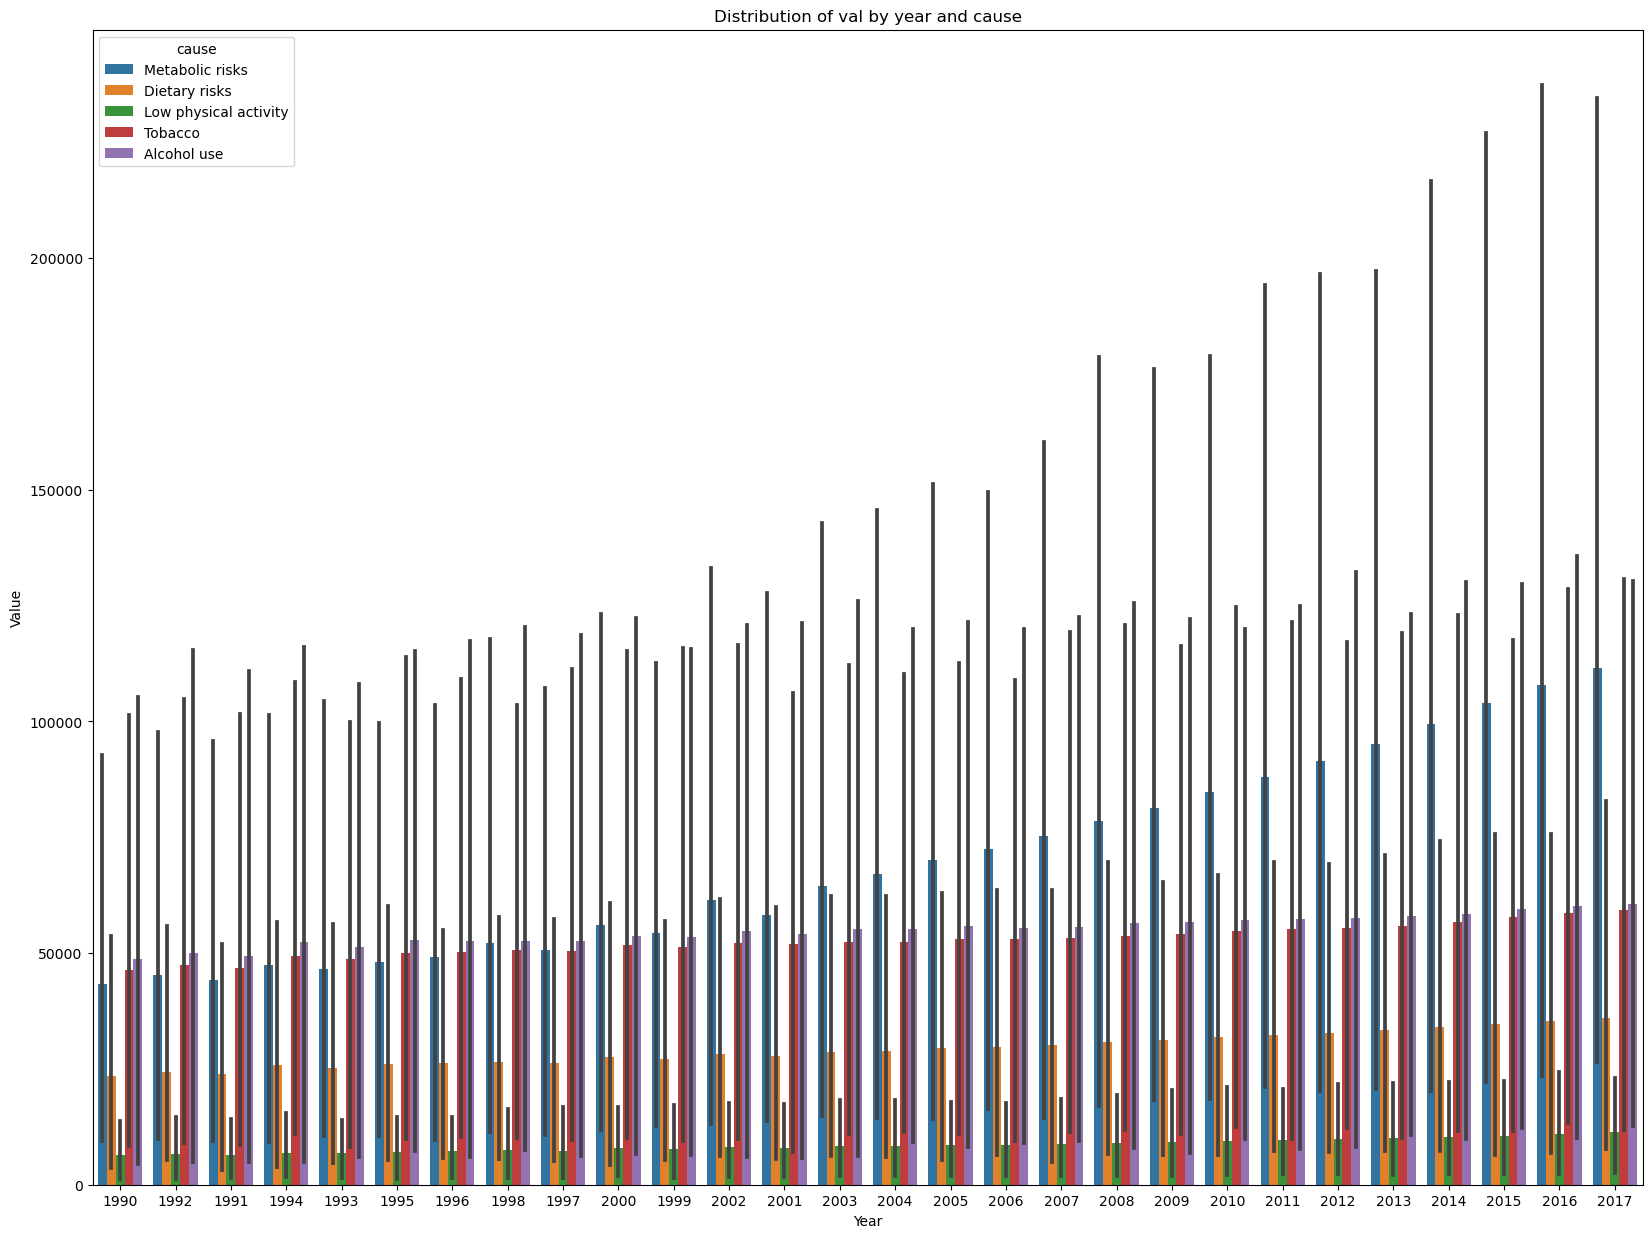

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
df['val'] = pd.to_numeric(df['val'], errors='coerce')
# Create a bar plot of the distribution
plt.figure(figsize=(20, 15))
sns.barplot(x='year', y='val', hue='cause', data=df)
plt.title('Distribution of val by year and cause')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()
